<a href="https://colab.research.google.com/github/KritikaSati/Forecasting-Model/blob/main/ForecastingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 9.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df = pd.read_excel('gdrive/My Drive/SuperstoreData.xls')
print(df.head())

Mounted at /content/gdrive
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0    

In [11]:
Technology = df.loc[df['Category'] == 'Technology']
Technology['Order Date'].min(), Technology['Order Date'].max()
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
Technology.drop(cols, axis=1, inplace=True)
Technology = Technology.sort_values('Order Date')
Technology.isnull().sum()
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()
Technology = Technology.set_index('Order Date')
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64


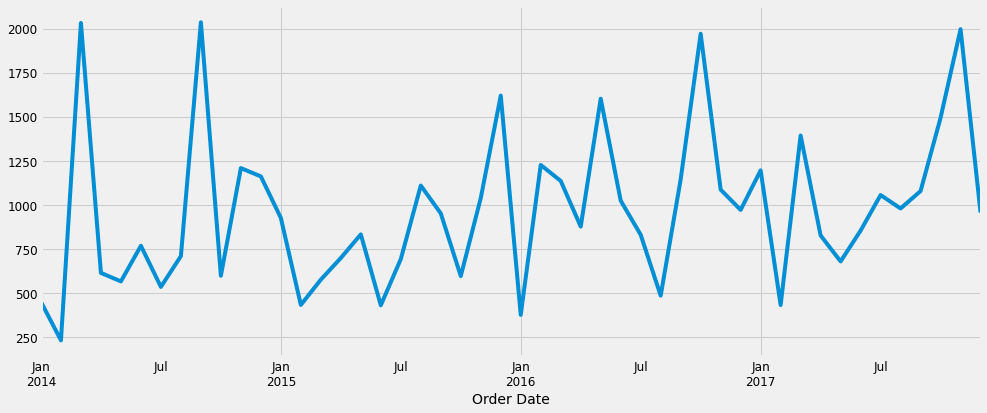

In [12]:
y = Technology['Sales'].resample('MS').mean()
print(y['2017': ])
y.plot(figsize=(15,6))
plt.show()

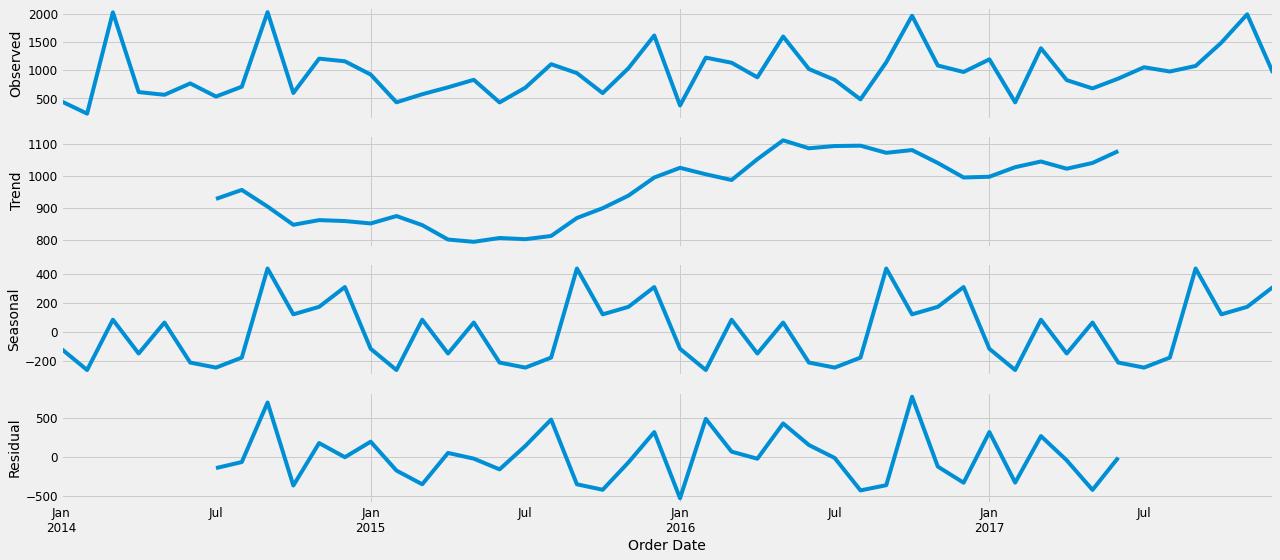

In [13]:
from pylab import rcParams  #parameters are imported 
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')  #statistical model (sm used)
fig = decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Example of parameter combinations for seasonal ARIMA')
print('SARIMA: {} x {}' .format(pdq[1], seasonal_pdq[1]))
print('SARIMA: {} x {}' .format(pdq[1], seasonal_pdq[2]))
print('SARIMA: {} x {}' .format(pdq[2], seasonal_pdq[3]))
print('SARIMA: {} x {}' .format(pdq[2], seasonal_pdq[4]))

Example of parameter combinations for seasonal ARIMA
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:791.4891765009955
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1362.2654837201371
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:549.0156237882129
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:564.1031529698099


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1478.704077754767
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:372.6612068172691
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:750.8969484750878
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2787.20065336625
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:535.0489454747917
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:566.0827904028198


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:373.876006586865
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:729.3478530285049


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1476.8934474767586
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:562.7585880992684
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:543.3082156228088


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1159.0014845192118
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:377.03544814349607
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:675.9599897483571
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2658.7048782922984
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:517.5329284811219
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:526.5542322434151
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2819.3039641280425
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:359.52308427542516
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:742.0250351345342


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1711.1670176409493
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:550.272134077019
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:543.2786122758253


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1395.963286802571
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:359.3768706589758
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:699.8975570622555
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2738.112517462606
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:536.8995751104078
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:527.794223294409
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:106115.87995599842
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:361.3149257974898
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:717.9677328156988
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1354.9320599275889

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:555.4581770800665
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:522.5042506796632


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1525.7414600645277
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:355.1259547274765
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:677.6306925349012
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2658.456497030966
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:518.7903710454553
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:513.1256895923909
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2826.9453127035126
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:343.603733597345
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.249     -1.067      0.286      -0.755       0.223
ma.L1         -1.0001      0.348     -2.870      0.004      -1.683      -0.317
ar.S.L12      -0.5003      0.175     -2.852      0.004      -0.844      -0.157
sigma2      2.243e+05   1.55e-06   1.44e+11      0.000    2.24e+05    2.24e+05


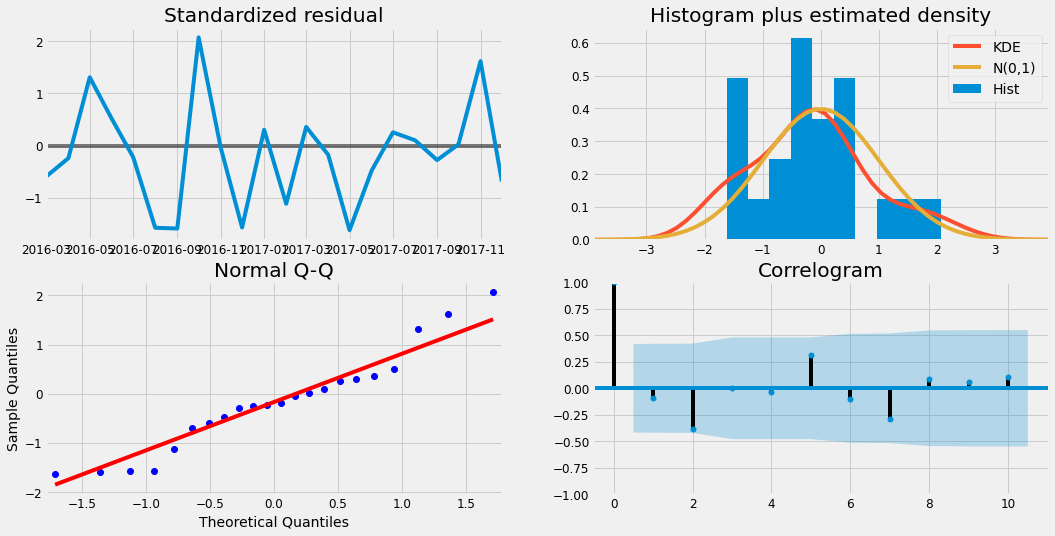

In [15]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y, order= param, seasonal_order = param_seasonal, enforce_stationarity = False, enforce_invertibility = False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal, results.aic))
    except:
        continue
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order = (1,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
result = mod.fit()
print(results.summary().tables[1] )
results.plot_diagnostics(figsize=(16,8))
plt.show()

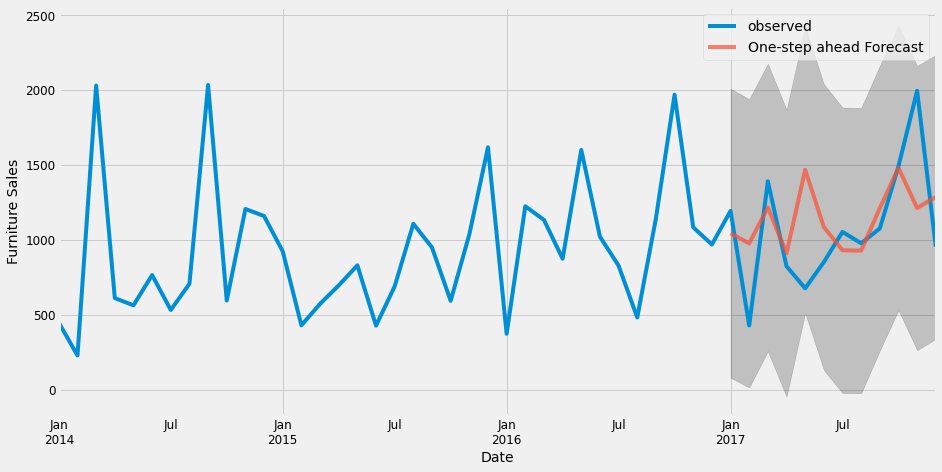

In [16]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax= ax, label = 'One-step ahead Forecast', alpha =.7, figsize =(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))
print('The Root Mean Squared Error of out forecasts is {}'.format(round(np.sqrt(mse),2)))

The Mean Squared Error of our forecasts is 150095.64
The Root Mean Squared Error of out forecasts is 387.42


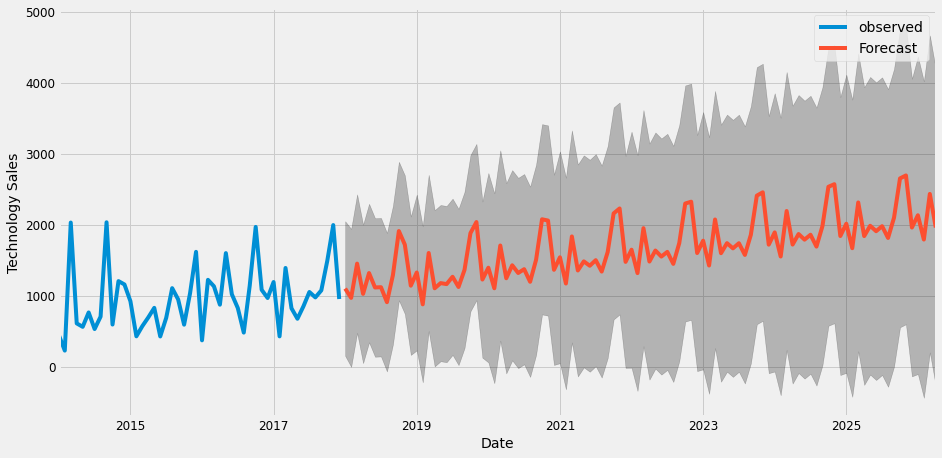

In [19]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = 'observed', figsize = (14,7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()